In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
dataset = pd.read_csv('churn.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
dataset.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
dataset.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Exited'>

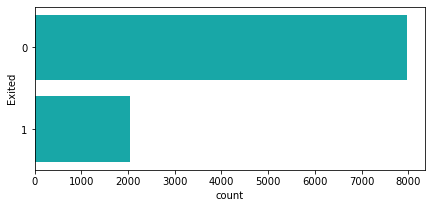

In [7]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Exited", data=dataset, color="c")

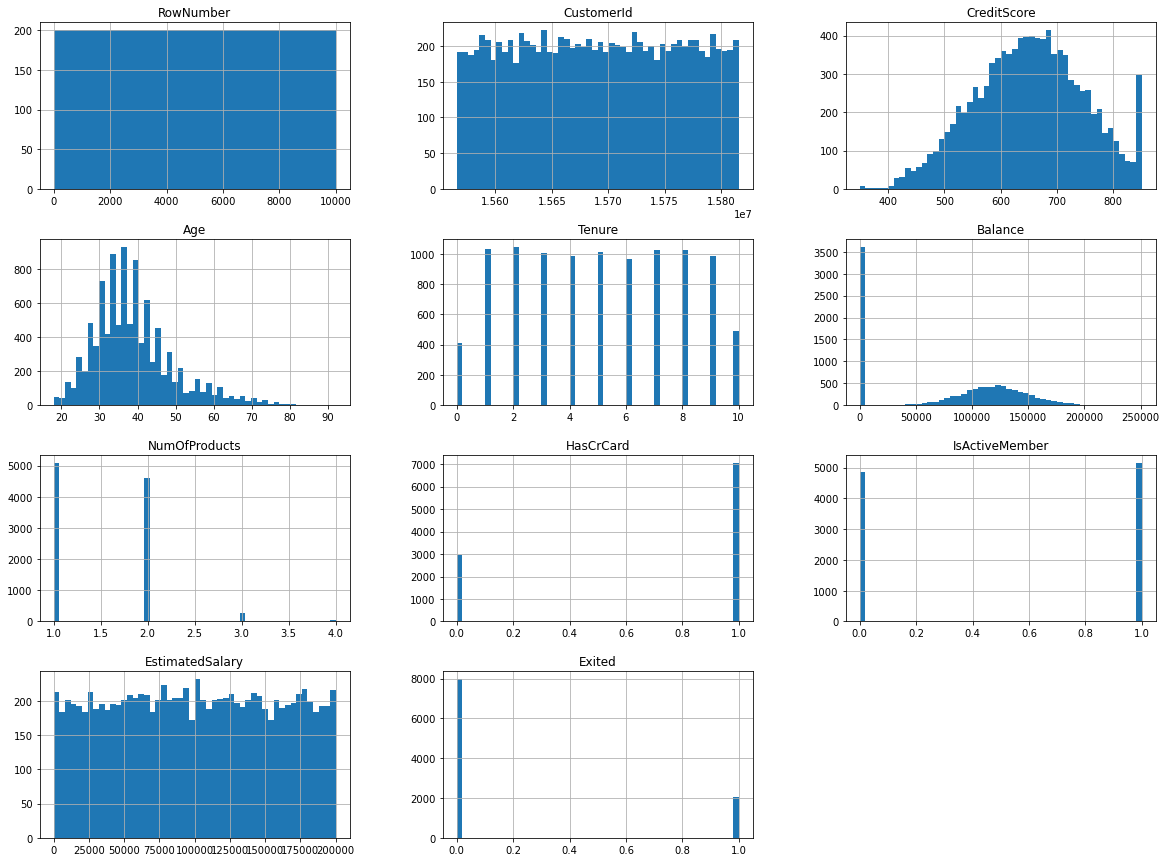

In [8]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

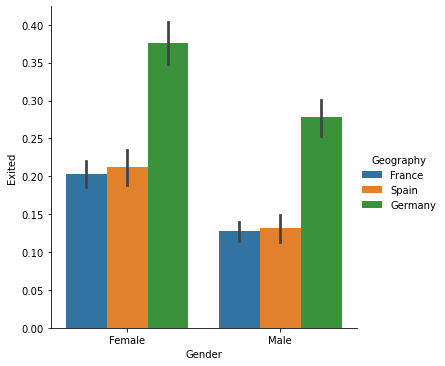

In [9]:
sns.catplot(x="Gender", y="Exited", hue="Geography", kind="bar", data=dataset)

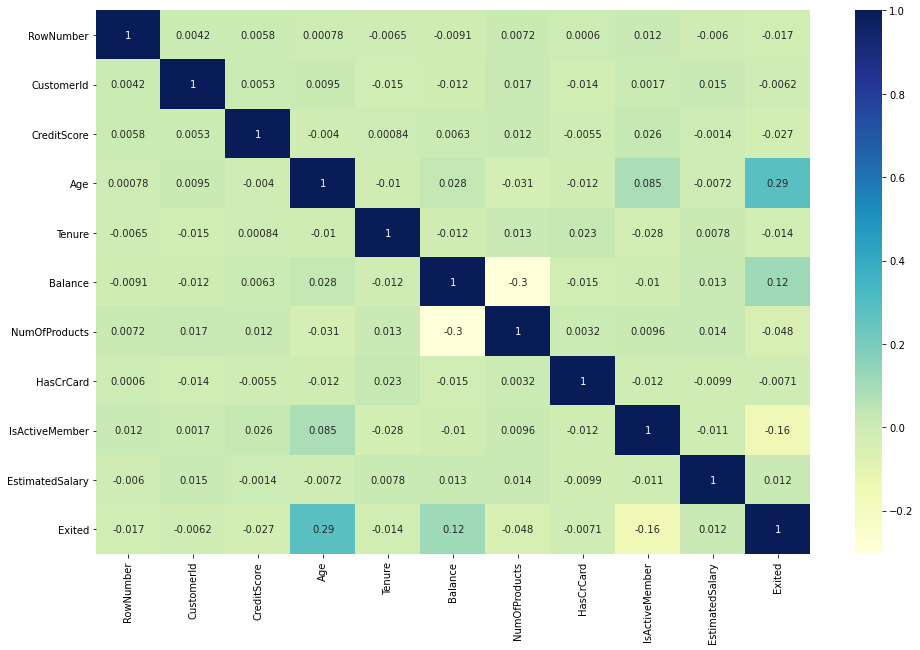

In [10]:
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

In [12]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
X = dataset.iloc[:,3:-1]
Y = dataset.iloc[:,-1]

In [14]:
print(X)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France       0   42       2       0.00              1   
1             608     Spain       0   41       1   83807.86              1   
2             502    France       0   42       8  159660.80              3   
3             699    France       0   39       1       0.00              2   
4             850     Spain       0   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France       1   39       5       0.00              2   
9996          516    France       1   35      10   57369.61              1   
9997          709    France       0   36       7       0.00              1   
9998          772   Germany       1   42       3   75075.31              2   
9999          792    France       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [15]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X)

In [17]:
print(X)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
print(X_train)

[[-0.99850112  1.71490137 -0.57273139 ... -1.55337352  0.97725852
   0.42739449]
 [ 1.00150113 -0.58312392 -0.57273139 ... -1.55337352 -1.02327069
  -1.02548708]
 [-0.99850112  1.71490137 -0.57273139 ...  0.64376017  0.97725852
  -0.94479772]
 ...
 [ 1.00150113 -0.58312392 -0.57273139 ...  0.64376017  0.97725852
  -0.14096853]
 [ 1.00150113 -0.58312392 -0.57273139 ...  0.64376017  0.97725852
   0.01781218]
 [-0.99850112  1.71490137 -0.57273139 ...  0.64376017 -1.02327069
  -1.15822478]]


In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)

0.81225

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_logreg = confusion_matrix(Y_test, Y_pred)
print(cm_logreg)
accuracy_score(Y_test, Y_pred)

[[1533   52]
 [ 323   92]]


0.8125

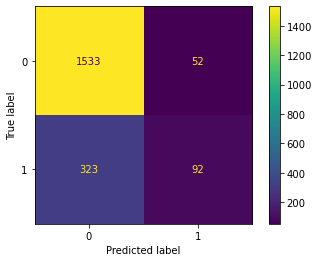

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, Y_test)  
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score , auc
roc_auc_score(Y_test,Y_pred)

0.594439588005017

In [24]:
from sklearn.naive_bayes import GaussianNB
NV_classifier = GaussianNB()
NV_classifier.fit(X_train, Y_train)

GaussianNB()

In [25]:
Y_pred = NV_classifier.predict(X_test)
NV_classifier.score(X_train, Y_train)

0.81925

In [26]:
cm_NV = confusion_matrix(Y_test, Y_pred)
print(cm_NV)
accuracy_score(Y_test, Y_pred)

[[1500   85]
 [ 263  152]]


0.826

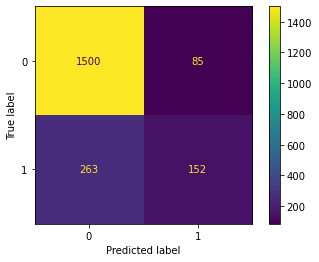

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(NV_classifier, X_test, Y_test)  
plt.show()

In [27]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [28]:
Y_pred = svm_classifier.predict(X_test)
svm_classifier.score(X_train, Y_train)

0.79725

In [29]:
cm_svm = confusion_matrix(Y_test, Y_pred)
print(cm_svm)
accuracy_score(Y_test, Y_pred)

[[1585    0]
 [ 415    0]]


0.7925

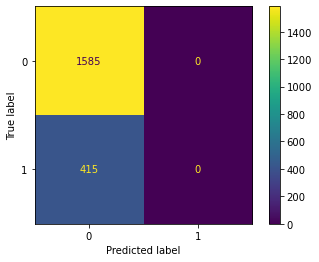

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_classifier, X_test, Y_test)  
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

1.0

In [31]:
cm_rf = confusion_matrix(Y_test, Y_pred)
print(cm_rf)
accuracy_score(Y_test, Y_pred)

[[1533   52]
 [ 224  191]]


0.862

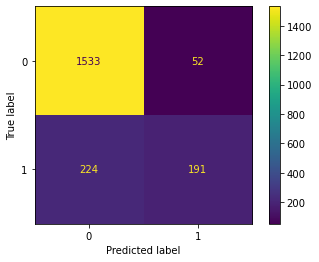

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_forest, X_test, Y_test)  
plt.show()